Scratch Notes for AAI 530 Final Project
by Bryan Carr
27 Feb 2022

In [17]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
## Read in the Data
spotify_df = pd.read_csv("genres_v2.csv")

C:\Users\bcarr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
spotify_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [20]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [21]:
spotify_df['type'].value_counts()

audio_features    42305
Name: type, dtype: int64

In [22]:
spotify_df = spotify_df.drop(columns=['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title'])

In [23]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  duration_ms       42305 non-null  int64  
 12  time_signature    42305 non-null  int64  
 13  genre             42305 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 4.5+ MB


In [24]:
spotify_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


<AxesSubplot:>

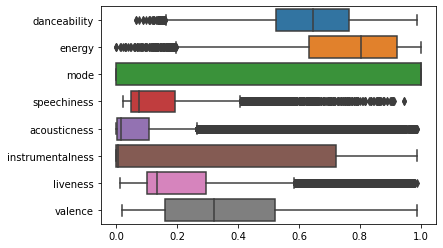

In [25]:
# EDA: Tick Plots

sns.boxplot(data=spotify_df.drop(['duration_ms', 'loudness', 'tempo', 'key', 'time_signature'], axis=1), orient='h')
#plt.xticks(rotation=90)

In [26]:
spotify_df['genre'].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

In [27]:
spotify_df['genre'].unique().tolist()

['Dark Trap',
 'Underground Rap',
 'Trap Metal',
 'Emo',
 'Rap',
 'RnB',
 'Pop',
 'Hiphop',
 'techhouse',
 'techno',
 'trance',
 'psytrance',
 'trap',
 'dnb',
 'hardstyle']

In [28]:
    for i in spotify_df['genre']:
        if i == 'Dark Trap':
            i == 'trap'
        elif i == 'Underground Rap':
            i == 'Rap'
        elif i == 'Trap Metal':
            i == 'trap'
        elif i == 'techhouse':
            i == 'techno'
        elif i == 'psytrance':
            i == 'trance'

In [29]:
spotify_df.replace('Dark Trap', 'trap', inplace=True)
spotify_df.replace('Underground Rap', 'Rap', inplace=True)
spotify_df.replace('Trap Metal', 'trap', inplace=True)
spotify_df.replace('techhouse', 'techno', inplace=True)
spotify_df.replace('psytrance', 'trance', inplace=True)


In [30]:
spotify_df['genre'].value_counts()

trap         9521
Rap          7723
trance       5960
techno       5931
Hiphop       3028
dnb          2966
hardstyle    2936
RnB          2099
Emo          1680
Pop           461
Name: genre, dtype: int64

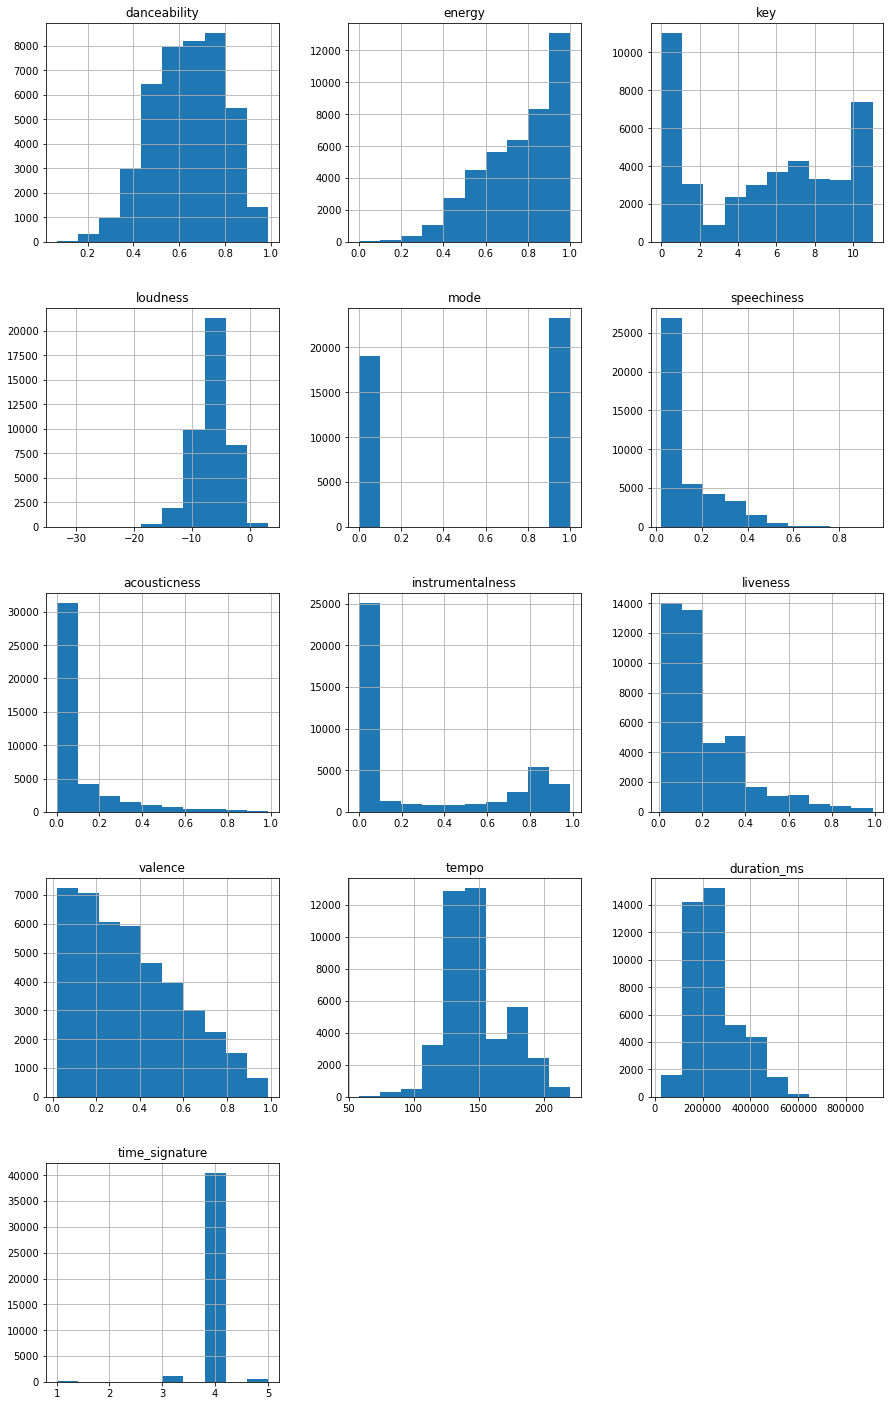

In [31]:
spotify_histograms = spotify_df.hist(layout=(5,3), figsize=(15,25))

In [32]:
# spotify_df['in genre']

If (df['genre'] == 'target')
    Then df['In Target'] == True
    Else df['In Target'] == False


Try:
df['In Target'] = ('True' if df.loc[


for i in df['genre']:
    if i == target,

In [33]:
# Loop to create a new list of True/False if the Song is in Rap genre
target = 'Emo'
in_target = []

for i in spotify_df['genre']:
    if i == target:
        in_target.append(True)
    else:
        in_target.append(False)


In [34]:
in_target

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [35]:
in_target.count(True)

1680

In [36]:
spotify_df['genre'].value_counts()

trap         9521
Rap          7723
trance       5960
techno       5931
Hiphop       3028
dnb          2966
hardstyle    2936
RnB          2099
Emo          1680
Pop           461
Name: genre, dtype: int64

In [37]:
spotify_df2 = spotify_df
spotify_df2['in_genre'] = in_target
spotify_df2 = spotify_df2.drop('genre', axis=1)
spotify_df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,in_genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,False
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,False
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,False
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,False
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,False


In [38]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score

In [39]:
    spotify_df['in_genre'] = in_target
    spotify_df = spotify_df.drop('genre', axis=1)

    # Build Test-Train Splits, with a Test Size of 15%
    train_df, test_df = train_test_split(spotify_df, test_size=0.15, random_state=4444)

    X_train, Y_train = train_df.drop(columns='in_genre'), train_df['in_genre']

    X_test, Y_test = test_df.drop(columns='in_genre'), test_df['in_genre']

In [40]:
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
12187,0.579,0.719,11,-5.770,1,0.0318,0.01400,0.000625,0.2080,0.0999,125.020,193190,4
11979,0.811,0.855,1,-4.479,1,0.7440,0.04720,0.000000,0.2530,0.6780,170.079,81820,4
24319,0.803,0.586,9,-8.897,1,0.1020,0.03190,0.720000,0.1060,0.0381,126.025,339048,4
42262,0.630,0.887,7,-5.847,1,0.0706,0.01070,0.000141,0.1750,0.6070,149.998,228750,4
17506,0.881,0.623,1,-9.662,1,0.1190,0.25700,0.000002,0.0964,0.7450,177.906,129547,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,0.851,0.673,1,-5.405,1,0.2570,0.04520,0.000000,0.3140,0.7760,120.973,181509,4
4275,0.387,0.899,6,-8.270,0,0.0598,0.00157,0.711000,0.2140,0.2060,149.989,280200,3
24475,0.912,0.790,8,-6.830,1,0.0667,0.00067,0.779000,0.0633,0.6230,124.000,247792,4
27037,0.772,0.875,1,-10.460,0,0.0476,0.01200,0.867000,0.1330,0.6880,138.007,337230,4


In [41]:
Y_train.value_counts()

False    34535
True      1424
Name: in_genre, dtype: int64

In [42]:
import xgboost as xgb

In [43]:
xgb.set_config(verbosity=2)

In [44]:
D_train = xgb.DMatrix(X_train, label=Y_train.astype(int))
D_test = xgb.DMatrix(X_test, label=Y_test)

In [45]:
paramaters = {
    'max_depth' : 3,
    'objective' : 'binary:logistic',
    'num_steps' : 20,
    'num_class' : 2
}

xgb_model = xgb.XGBClassifier(max_depth=4, num_steps=20, random_state = 4444, objective = 'binary:logistic', booster='gbtree', use_label_encoder=False)

In [46]:
xgb_model

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=4,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              num_steps=20, predictor=None, random_state=4444, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=False,
              validate_parameters=None, verbosity=None)

In [47]:
xgb_classifier = xgb_model.fit(X_train, Y_train.astype(int))

[15:52:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "num_steps" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:52:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:52:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.

In [48]:
prediction = xgb_classifier.predict(X_test)

In [49]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
confusion_matrix(Y_test, prediction)

array([[6057,   33],
       [ 122,  134]], dtype=int64)

In [51]:
f1_score(Y_test, prediction)

0.6335697399527188

In [55]:
print(np.array2string(confusion_matrix(Y_test, prediction)))

[[6057   33]
 [ 122  134]]


In [ ]:
xgb_classifier.score(X_train, Y_train)

In [ ]:
paramaters = {
    "max_depth" : [4,5,6],
    "learning_rate" : [0.1, 0.2, 0.3],
    "num_steps" : [10,20],
    "gamma" : [0.3, 0.5]
}

clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric = f1_score, eval_set = [(X_test, Y_test)])

In [ ]:
grid_search = GridSearchCV(clf, paramaters, n_jobs = -1, cv=4, verbose=2)

In [ ]:
grid = grid_search.fit(X_train,Y_train.astype(int))
grid

In [ ]:
print("OK printed")
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
pred = grid.predict(X_test)

In [ ]:
confusion_matrix(Y_test, pred)

In [ ]:
f1_score(Y_test, pred)

I want to score different genres by Cross Validation, to find if there are any that the model works well on

for (every Genre in List of Genres):

    reset data
    split off Genre target
    Test_Train split

    initialize XGB model
    Grid_Score_CV on model

    Score best model on Test data

    Add to New dataframe: Genre, best Score, best model params


In [ ]:
for variable in ['duration_ms', 'loudness', 'tempo', 'key', 'time_signature']:
    sns.boxplot(data=spotify_df.loc[:,variable], orient='h').set(title="Boxplot for " + str(variable))
    plt.show()